In [ ]:
#TASK LIST 22/09/2020
#get forward and backward pass to work on the dataset DONE 
#then montecarlo simulations with critical path DONE FOR 1X. NEED TO PUT INTO A GRAPH AND CHECK WORKS -- how are we going to plot this??
#NEED TO LOOP FOR 1000 TIMES AND APPEND THE LATEST FINISH 
# add deliverables to have more structure 
#edit regex ids for longer than 26 letters 
#use real data set -- make sure works with critical 

In [75]:
import re 
import numpy as np 
import os 
import pandas as pd
import matplotlib.pyplot as plt 


In [61]:
class Task(object):
    def __init__(self, description, ID, predecessors, days1):
        self.description = description 
        self.ID = ID
        self.predecessors = predecessors
        self.days1 = days1
        self.earlyStart = 0 
        self.earliestFinish = 0
        self.sucessors = []
        self.latestStart = 0
        self.latestFinish = 0
        self.slack = 0
        self.critical = ' '
    #compute the slack for a task 
    def ComputeSlack(self):
        self.slack=self.latestFinish-self.earliestFinish 
        if self.slack > 0:
            self.critical = 'NO'
        else: 
            self.critical = 'YES'



In [70]:
def importData(csvfile):
    dataframe=pd.read_csv(csvfile)
    return dataframe

#function to compute the number of days the task will be carried out for 
#may have to convert to timefile .. not so simple with different start and end dates
def calculateDays(dataframe):
    
    dataframe['startdate']=pd.to_datetime(dataframe['startdate'])
    dataframe['enddate']=pd.to_datetime(dataframe['enddate'])
    dataframe['timediff'] = dataframe['enddate']-dataframe['startdate']
    dataframe['days']=pd.to_numeric(dataframe['timediff'].dt.days)
    #dataframe['days']=(dataframe['enddate']-dataframe['startdate']).days 
    return dataframe 


In [63]:
#import the csv file and add in the columns. maybe do this on excel. 
def createTasks(dataframe):
    taskObject = []
    for i in range(len(dataframe)):
        taskObject.append(Task(dataframe['description'][i], dataframe['ID'][i], dataframe['predecessors'][i], dataframe['days1'][i]))
    return (taskObject)
    
def forwardPass(taskObject):
    #rule 1 the earliest start of activity with no predecessors = 0 
    #rule 2 the earliest start is max early finish of predecessors 
    #rule 3 early finish = sum of ES and activity time 
    for task in taskObject:
        
        if type(task.predecessors) is str:
            task.predecessors=task.predecessors.upper()
            ef = []
            for j in task.predecessors :
                for t in taskObject:
                    if t.ID == j :
                        ef.append(t.earliestFinish)
                task.earlyStart = max(ef)
            del ef 
        else: 
            task.earlyStart = 0 
        task.earliestFinish = task.earlyStart + task.days1
        

In [64]:
def backwardPass(taskObject):
    pred=[]
    eF=[]
    #forward pass is carried out first 
    #gather earliest finish of all tasks and fill predecessors 
    #compute the successors of each task 
    for task in taskObject:
        
        if type(task.predecessors)==str:
            
            for j in task.predecessors:
                pattern=re.compile(r' [A-Z]') #using regex expressions. limitation of 26 tasks need to convert to numbers
                match=pattern.finditer(j)
                for r in match:
                    pred.append(j) #fill predecessor list of all tasks 
                    #fill successors 
                    for m in taskObject:
                        if m.ID == j:
                            m.successors.append(task.ID)   
        eF.append(task.earliestFinish)
        
    for task in reversed(taskObject):
        if task.ID not in pred:
            task.latestFinish=max(eF)
        else:
            minLS = []
            for x in task.successors:
                for t in (taskObject):
                    if t.ID == x:
                        minLS.append(t.latestStart)
            task.latestFinish = min(minLS) 
            del minLS
        task.latestStart = task.latestFinish - task.days1


In [56]:
#this simulation uses the startdate and finds number of days predicted based on a uniform distribution of random numbers

        
def randomise_days(dataframe):
    dataframe['days1'] = np.nan
    timediff=dataframe['days']
    


    N = len(dataframe)
    ran = np.zeros(N, dtype=float)


    for p in range(N):
        ran[p] = np.random.uniform(low=0.0, high=1.0, size=None)
        dataframe['days1'][p]=timediff[p]-0.1*timediff[p]+timediff[p]*0.2*ran[p]
        dataframe['days1'][p]=round(dataframe['days1'][p], 0)
    return dataframe 

In [65]:
def slack(taskObject):
    for task in taskObject:
        task.ComputeSlack() #dont understand this as well
        
        
def updateDataFrame(df, taskObject):
    df2 = pd.DataFrame({'description' : df['description'], 'ID' : df['ID'], 'opt' : df['opt'], 
                        'most':df['most'], 'pess':df['pess'], 'days1':df['days1'], 
                        'ES':pd.Series([task.earlyStart for task in taskObject]), 
                        'EF':pd.Series([task.earliestFinish for task in taskObject]), 
                        'LS':pd.Series([task.latestStart for task in taskObject]),
                        'LF':pd.Series([task.latestFinish for task in taskObject]),
                        'SLACK':pd.Series([task.slack for task in taskObject]),
                        'CRITICAL':pd.Series([task.critical for task in taskObject])})
    return df2

                 
         
    

df1=importData('CRITICALPATHdates.csv')

df1



In [38]:
def main():
    os.system('clear')
    df1=importData('CRITICALPATHdates.csv')[0:24] #for alphabet reasons  
    df1=calculateDays(df1)
    taskObject = createTasks(df1)
    forwardPass(taskObject)
    backwardPass(taskObject)
    slack(taskObject)
    finaldf=updateDataFrame(df1, taskObject)
    print(df1)
    print(finaldf)
    


In [71]:


os.system('clear')
df1=importData('CRITICALPATHdates.csv')[0:24] #for alphabet reasons  
df2=calculateDays(df1)
df1 = randomise_days(df1)
taskObject = createTasks(df1)
forwardPass(taskObject)
backwardPass(taskObject)
slack(taskObject)
finaldf=updateDataFrame(df1, taskObject)
print(finaldf)


/usr/local/bin/start_ipykernel.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/bin/start_ipykernel.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                                          description ID  opt  most  pess  \
0   Thermal Design of Superconducting High Field M...  A  NaN   NaN   NaN   
1                                Beam instrumentation  B  NaN   NaN   NaN   
2                      Cold powering: DFBX for String  C  NaN   NaN   NaN   
3                    Laser treatment prototype (LESS)  D  NaN   NaN   NaN   
4           High-order corrector magnets + prototypes  E  NaN   NaN   NaN   
5                Nested orbit correctors + prototypes  F  NaN   NaN   NaN   
6                                       D2 Correctors  G  NaN   NaN   NaN   
7   Cold testing of  corrector magnets and crab ca...  H  NaN   NaN   NaN   
8                      D1 magnet model and cold mass   I  NaN   NaN   NaN   
9                        D2 model + prototype+ Magnet  J  NaN   NaN   NaN   
10                                      Crab Cavities  K  NaN   NaN   NaN   
11                                    Triplet magnets  L  NaN   NaN   NaN   

(array([5., 0., 5., 1., 2., 3., 3., 0., 2., 3.]),
 array([1332. , 1358.5, 1385. , 1411.5, 1438. , 1464.5, 1491. , 1517.5,
        1544. , 1570.5, 1597. ]),
 <a list of 10 Patch objects>)

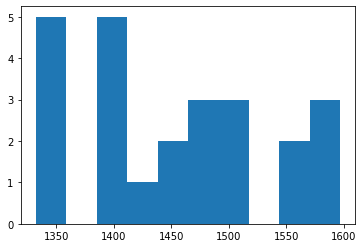

In [78]:
days = (df1['days1'])
plt.hist(days, bins = 10)